# 4. Evaluting  Machine learning  model

Three ways to Evaluate the Scikit learn/algorithms
1. The `score` method
2. The `scoring` method
3. Probelm Specific metric-functions

##4.1 'SCORE' Method:


In [32]:
#Standard imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis =1)
y= heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)



0.8524590163934426

## 4. Evaluating the model with `Scoring` Parameter

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis =1)
y= heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)






RandomForestClassifier()

In [8]:
clf.score(x_test,y_test)

0.8524590163934426

In [10]:
cross_val_score(clf,x_test,y_test)

array([0.84615385, 0.75      , 0.75      , 0.83333333, 0.91666667])

In [12]:
np.random.seed(42)

#Single training and splitting once:
clf_single_score = clf.score(x_test,y_test)

#Multiple training and using 5 cross validation:
clf_cv_score = np.mean(cross_val_score(clf,x_test,y_test))

#Compare both of them:
clf_single_score , clf_cv_score



(0.8524590163934426, 0.8025641025641026)

## 4.2.1 Classification model evaluation matrices

1. Accuracy
2. Area under Roc Curve
3. confusion Matrix
4. Classification Report

### Accuracy:

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis =1)
y= heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)

cross_val_score = cross_val_score(clf,x,y)
cross_val = np.mean(cross_val_score)
cross_val

0.811639344262295

In [18]:
print(f"Heart disease classifier cross-validated accuracy: {cross_val*100}")

Heart disease classifier cross-validated accuracy: 81.1639344262295


### Area under the reciever operating characteristic curve (AOC/ROC)

*Area under the curve
*ROC curve

ROC curve are a comparision of model's true positive rate(tpr) and model's false positive rate(fpr)

true positive(tpr)= when model predicts 1 when truth is 1

false positive(fpr)= when model predicts 0 when truth is 1

true negative = when model predicts 0 when truth is 0

false negative = when model predicts 0 when truth is 1



In [26]:
from sklearn.metrics import roc_curve

#fitting the model
clf.fit(x_train, y_train)

# Make predictions with probabilities:
y_probs = clf.predict_proba(x_test)

y_probs[:10] , len(y_probs)

(array([[0.9 , 0.1 ],
        [0.5 , 0.5 ],
        [0.53, 0.47],
        [0.93, 0.07],
        [0.24, 0.76],
        [0.1 , 0.9 ],
        [0.28, 0.72],
        [0.96, 0.04],
        [0.97, 0.03],
        [0.47, 0.53]]),
 61)

In [22]:
y_probs_pos = y_probs[:,1]
y_probs_pos[:10]

array([0.08, 0.64, 0.48, 0.1 , 0.81, 0.83, 0.73, 0.07, 0.07, 0.58])

In [28]:
#claculate fpr,tpr and threshold:
fpr, tpr , thresholds = roc_curve(y_test,y_probs_pos)
# check false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.06896552, 0.17241379, 0.17241379,
       0.20689655, 0.20689655, 0.34482759, 0.48275862, 0.48275862,
       0.55172414, 0.62068966, 0.75862069, 0.82758621, 0.89655172,
       1.        ])

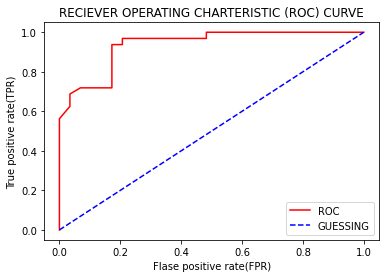

In [34]:
# Create a function for plotting roc curves:

def plot_roc_curve(fpr,tpr):
    """
    plots a roc curve with the given false positive rate(fpr)
    and true positive rate(tpr)
    
    """
    #plotting roc curve:
    plt.plot(fpr,tpr,color="red",label="ROC")
    
    #plotting the base line:
    plt.plot([0,1],[0,1],color="blue", linestyle = "--", label="GUESSING")
    
    #customizing the plot:
    plt.xlabel ("Flase positive rate(FPR)")
    plt.ylabel ("True positive rate(TPR)")
    plt.title ("RECIEVER OPERATING CHARTERISTIC (ROC) CURVE")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)
    

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_pos)

0.9358836206896552

## Confusion Matrix : 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppose to preidct

In essence, it gives you the idea where the model is getting confused.

In [38]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 6, 26]])

In [39]:
# Visualising the confusion matrix with the pd.crosstab:
pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual Labels"],
           colnames = ["Predicted Labels"])


Predicted Labels,0,1
Actual Labels,,
0,25,4
1,6,26


## Classification Report

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [44]:
# where precision and recall becomes more valuable than accuracy:
disease_true = np.zeros(10000)
disease_true[0] =1
disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict = True))

/Users/apple/Desktop/ml-course/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/Desktop/ml-course/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/Desktop/ml-course/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
* **Accuracy** is a good measure to start with all classes are balanced(e.g same amount of samples which are labbaled as 1 or 0)
* **Precision ** and **Recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives aim for higher precision.
*If false negative predictions are worse than false, positives, aim for higher recall.
* **F1-score** is a combination of recall and precision